# `quick_draw_tree()` Function Demo

Quickly draws a fairly presentable tree, colouring some or all tips by some particular attribute of interest (e.g. country, location, etc. In this demo, we're after the column named `geoloc`\*, which is the country. You'll need a tree file that's `baltic`-readable, and a `csv` file with a column of that attribute.

\* I try to avoid proper English words for variable names because these tend to be technical operators in whatever programming language you're using. e.g. Avoid using a parameter or column name like `length`, because there's normally a `length()` function in your programming langauge of choice (`length()` in R, `len()` in Python). Use something like `seq_length` instead - it's more specific anyway.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import time

import xio
import baltic3 as bt
import baltic3_utils as btu

from Bio import Phylo

path0="/users/dten0001/Google Drive/baltic3/"

In [3]:
tre = btu.austechia_read_tree(path0+"tutorials/zikv_id_only_ft.nex", date_delim="|")

dm = pd.read_csv(path0+"tutorials/zikv_m.csv")

# Add a 'query' column, which is actually just the tipnames already in zikv_id_only_ft.nex
# This is so that as we iterate over the leaves of our tree, we can look up the attribute of each leaf
# by searching by its name
dm["query"] = dm.apply(lambda row: str(row["v_nm"])+"|"+str(row["cdate"]), axis=1)
dm.head()

Number of objects found in tree string: 1628

Tree height: 0.155210
Tree length: 2.051600

Numbers of objects in tree: 1628 (766 nodes and 862 leaves)

Highest tip date: 2017.7288


,v_nm,v_id,host,geoloc,cdate,seq,query
0,KU501216,103344,Human,Guatemala,2015-12-01,----------------------------------------------...,KU501216|2015-12-01
1,KX262887,103451,Human,Honduras,2016-01-06,-----gttgttgatctgtgtgaatcagactgcgacagttcgagttt...,KX262887|2016-01-06
2,MF073359,15098,Human,Brazil,2015-03-01,----agttgttgatctgtgtgaatcagactgcgacagttcgagttt...,MF073359|2015-03-01
3,MF073358,15261,Human,Brazil,2015-06-01,----agttgttgatctgtgtgaatcagactgcgacagttcgagttt...,MF073358|2015-06-01
4,MF073357,16288,Human,Brazil,2016-02-01,----agttgttgatctgtgtgaatcagactgcgacagttcgagttt...,MF073357|2016-02-01


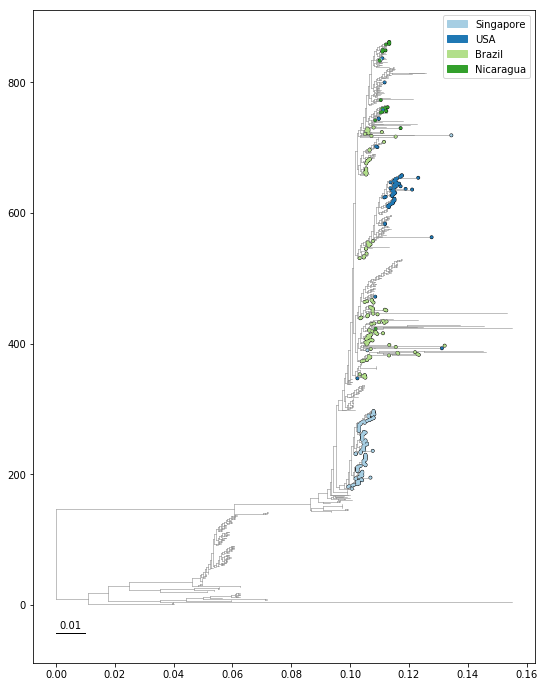

In [6]:
# Reading off the metadata dataframe, assign the attribute of interest to each leaf.traits attribute
tre = btu.assign_leaf_trait(tre, dm, "query", "geoloc")

btu.quick_draw_tree(tre, colour_by='geoloc', values_of_interest=["Singapore", "USA", "Brazil", "Nicaragua"],
                    branch_colour="gray")


In [4]:
# Need help? Check the function docs:
help(btu.quick_draw_tree)

Help on function quick_draw_tree in module baltic3_utils:

quick_draw_tree(tree, colour_by='', values_of_interest=[], fig_h=12, fig_w=9, branch_width=0.5, branch_colour='black', tip_shape_size=8, x_offset=0, save_fn='', verbose=True, show_borders=False)
    Draws a tree, and colours a set of tips based on an (optional) input dataframe, dm, with a column of interest, `colname`. 
    
    Params
    ------
    tree: input baltic tree.
    colour_by: str; trait key name to colour the tips by.
    values_of_interest: list of str; the traits of interest. If left as an empty list, will grab all possible values
    in the colour_by trait key value. WARNING: this could result in too many possible colour values to map. 
    fig_h: float; figure height.
    fig_w: float; figure width.
    branch_width: float; branch width (line weight).
    branch_colour: str; branch colour. Default black. 
    tip_shape_size: float; tip shape size.
    x_offset: float; x_offset. The root is placed at x=0 by def